In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from scipy import stats
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data[data.duplicated()]

,YearsExperience,Salary


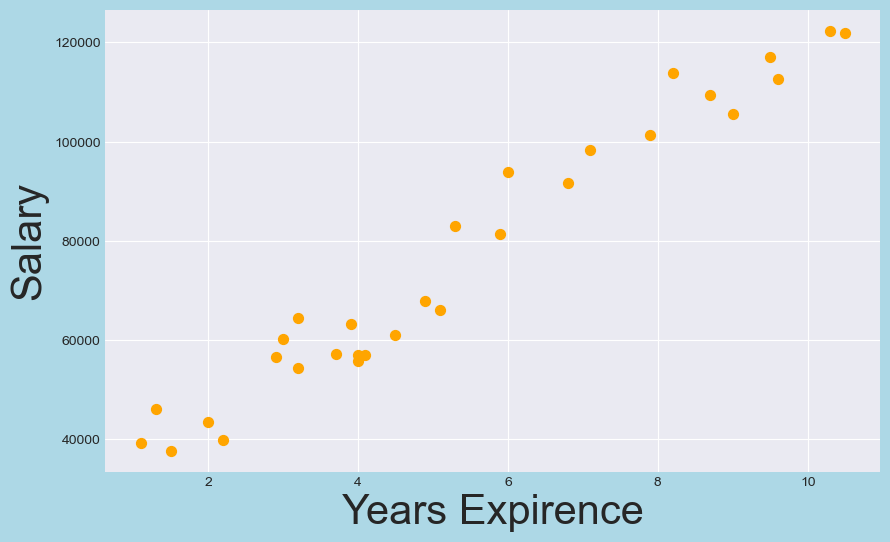

In [8]:
plt.figure(figsize=(10,6),facecolor="lightblue")
plt.style.use("seaborn-darkgrid")
plt.scatter(data.YearsExperience,data.Salary,s=50,color="orange")
plt.xlabel("Years Expirence",size=30)
plt.ylabel("Salary",size=30)
plt.show()

Text(0.5, 0, 'salary')

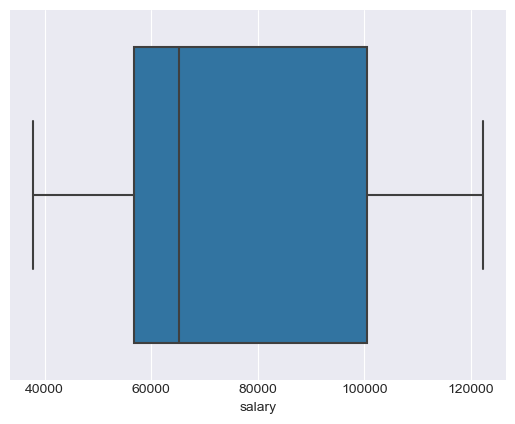

In [9]:
#checking for outliers
sns.boxplot(data["Salary"])
plt.xlabel ("salary")

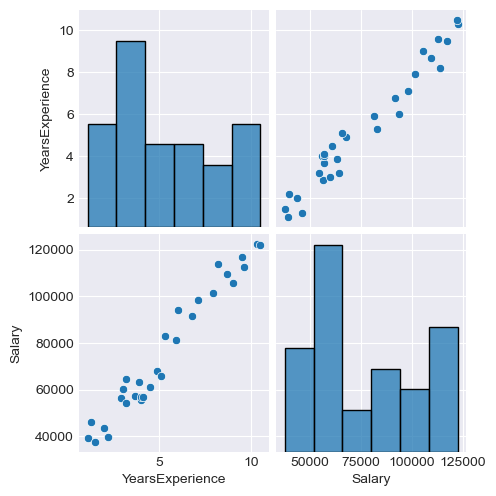

In [10]:
#checking the correlation using the pairplot
sns.pairplot(data)

In [11]:
data = data.rename({"YearsExperience":"YE","Salary":"Sal"},axis = 1)
data.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YE', ylabel='Density'>

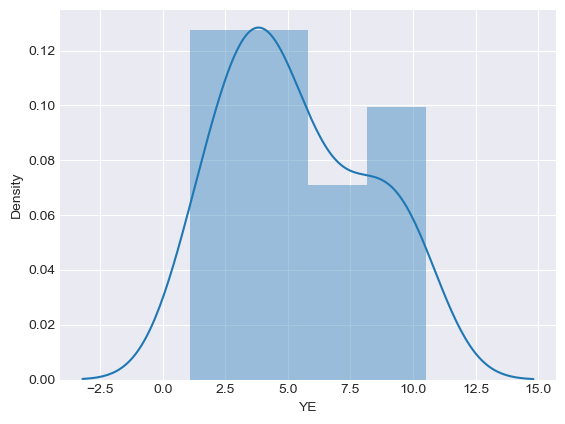

In [12]:
#checking distribution for the variables
sns.distplot(data['YE'])

<AxesSubplot:xlabel='Sal', ylabel='Density'>

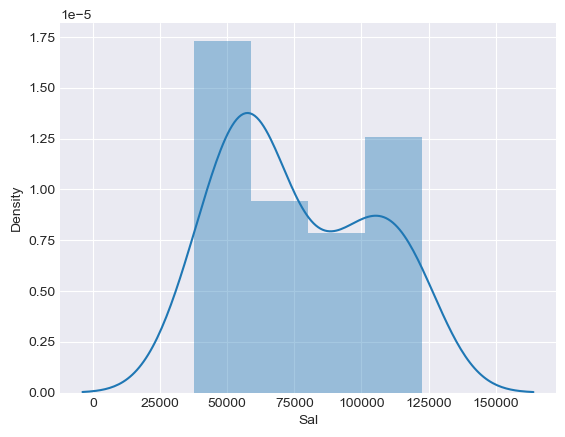

In [13]:
sns.distplot(data['Sal'])

# Building our model

In [14]:
model=LinearRegression()
model.fit(data[["YE"]],data["Sal"])

LinearRegression()

In [15]:
pred=model.predict(data[["YE"]])

In [16]:
pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [17]:
model.coef_

array([9449.96232146])

In [18]:
model.intercept_

25792.20019866871

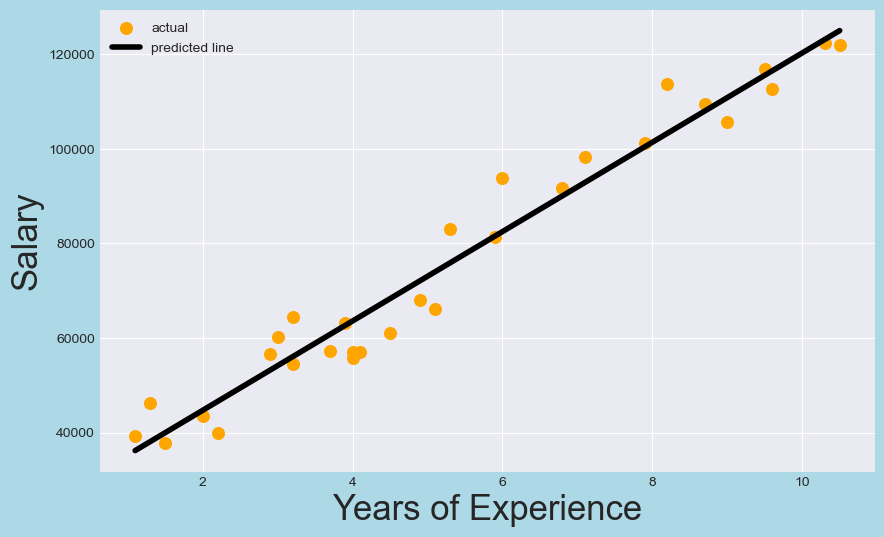

In [19]:
plt.figure(figsize=(10,6),facecolor="lightblue")
plt.style.use("seaborn-darkgrid")
plt.scatter(data.YE,data.Sal,s=70,color="orange",label="actual")
plt.plot(data.YE,pred,color="black",linestyle="-",linewidth=4,label="predicted line")
plt.legend(loc="best")
plt.xlabel("Years of Experience",size=25)
plt.ylabel("Salary",size=25)
plt.show()

# Evaluation of Model

In [20]:
r2_score(data["Sal"],pred)

0.9569566641435086

In [21]:
# Here our accuracy is 95% we also check with transformation

# Model Building with Transformation

## Log Transformation

In [22]:
x=data["YE"]
y=data["Sal"]

In [23]:
log_x=np.log(x)
log_y=np.log(y)
# data["log_x"]= log_x
# data["log_y"] = log_y

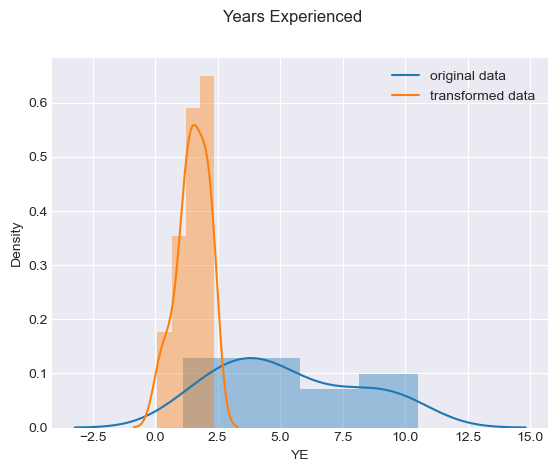

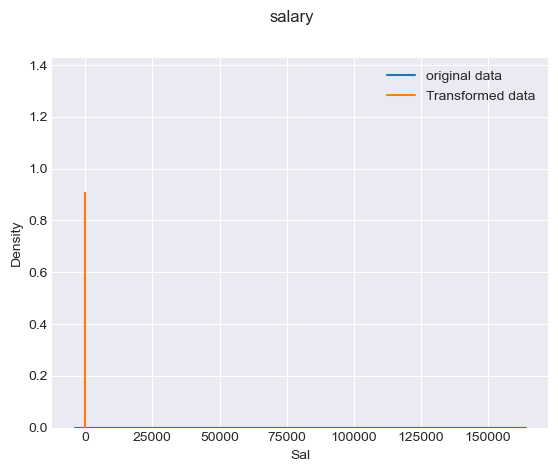

In [24]:
# Plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("Years Experienced")
sns.distplot(data["YE"])
sns.distplot(log_x)
labels = ("original data","transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("salary")
sns.distplot(data['Sal'])
sns.distplot(log_y)

labels = ("original data","Transformed data")
plt.legend(labels)
plt.show()


### Building our Model with Log Transformation

In [25]:
model_1=smf.ols("log_y~log_x",data=data).fit()

<AxesSubplot:xlabel='YE', ylabel='Sal'>

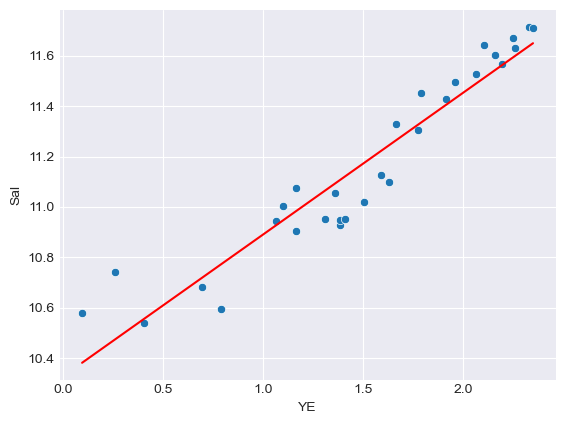

In [26]:
#Here we plot the best line plot
plt.plot(log_x,model_1.params[0]+model_1.params[1]*(log_x),"r")
sns.scatterplot(log_x,log_y)

In [27]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        18:48:17   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_x          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# In log Transformation the accuracy of the model is 90%

### Square Transformation

In [29]:
sq_x=np.square(x)
sq_y=np.square(y)

In [30]:
#Model building with square transformation
model_2 = smf.ols("sq_y~sq_x",data = data).fit()

<AxesSubplot:xlabel='YE', ylabel='Sal'>

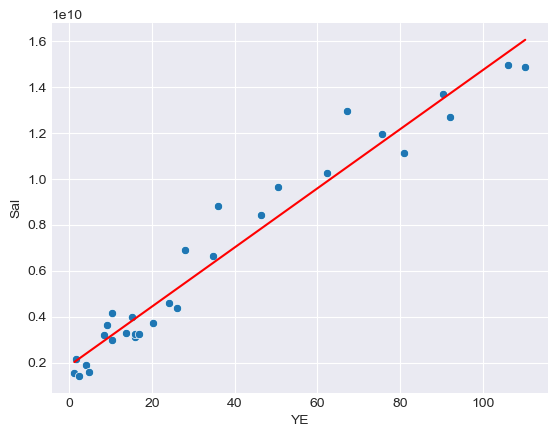

In [31]:
# Best line plot
plt.plot(sq_x,model_2.params[0]+model_2.params[1]*(sq_x),"r")
sns.scatterplot(sq_x,sq_y)

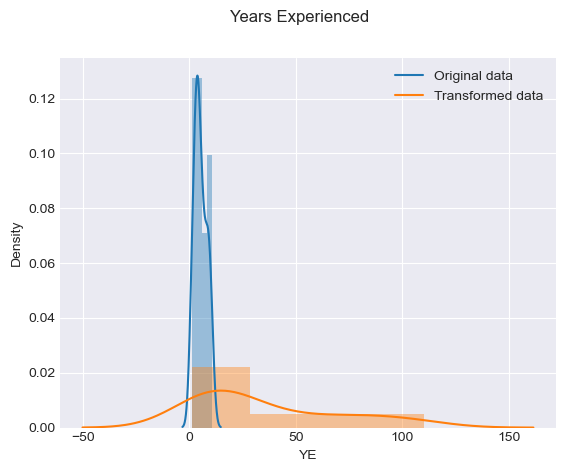

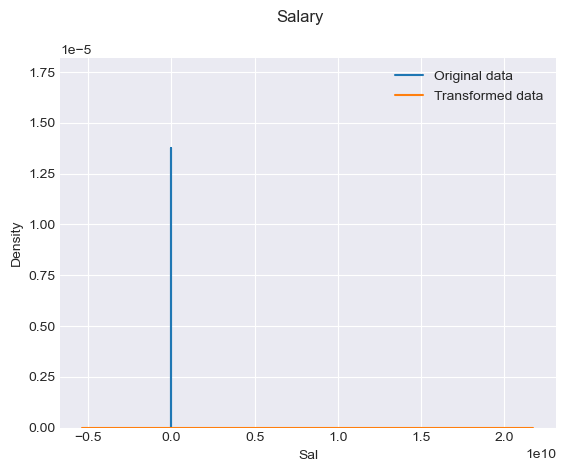

In [32]:
#plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("Years Experienced")
sns.distplot(x)
sns.distplot(sq_x)
labels = ("Original data","Transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("Salary")
sns.distplot(y)
sns.distplot(sq_y)

labels = ("Original data","Transformed data")
plt.legend(labels)
plt.show()


In [33]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sq_y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     581.9
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.82e-20
Time:                        18:48:17   Log-Likelihood:                -662.35
No. Observations:                  30   AIC:                             1329.
Df Residuals:                      28   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.866e+09   2.61e+08      7.138      0.000    1.33e+09     2.4e+09
sq_x        1.287e+08   5.34e+06     24.122      0.000    1.18e+08     1.4e+08
==============================================================================
Omnibus:                        6.800   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.404
Skew:                           1.014   Prob(JB):                       0.0671
Kurtosis:                       3.454   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# The accuracy of this model is 95.4% which is similar to without transformatioon model. 

### Square root Transformation

In [35]:
sqrt_x = np.sqrt(x)
sqrt_y = np.sqrt(y)

In [36]:
model_3 = smf.ols("sqrt_y~sqrt_x",data = data).fit()

<AxesSubplot:xlabel='YE', ylabel='Sal'>

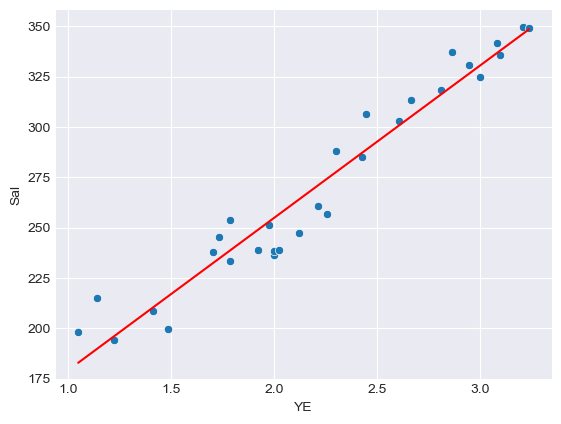

In [37]:
# Best line plot
plt.plot(sqrt_x,model_3.params[0]+model_3.params[1]*(sqrt_x),"r")
sns.scatterplot(sqrt_x,sqrt_y)

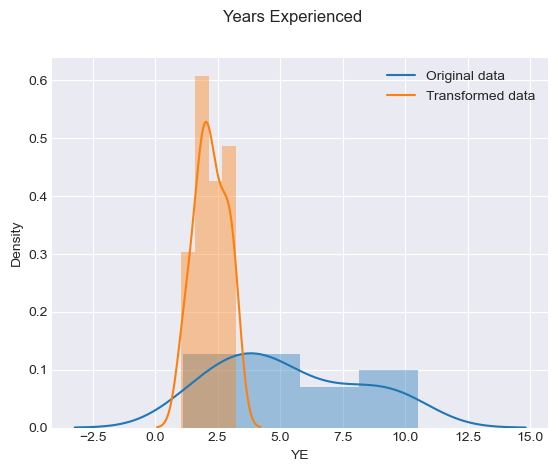

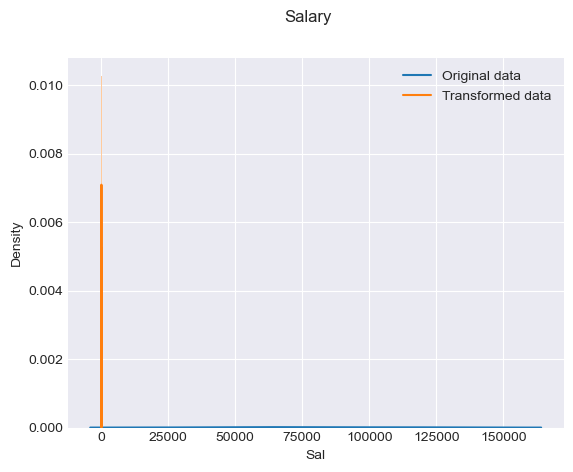

In [38]:
# Plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("Years Experienced")
sns.distplot(x)
sns.distplot(sqrt_x)
labels = ("Original data","Transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("Salary")
sns.distplot(y)
sns.distplot(sqrt_y)

labels = ("Original data","Transformed data")
plt.legend(labels)
plt.show()

In [39]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sqrt_y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        18:48:18   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
sqrt_x        75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# The accuracy of this model is 94%

## Cuberoot Transformation

In [41]:
cbrt_x = np.cbrt(x)
cbrt_y = np.cbrt(y)

In [42]:
model_4 = smf.ols("cbrt_y~cbrt_x",data = data).fit()

<AxesSubplot:xlabel='YE', ylabel='Sal'>

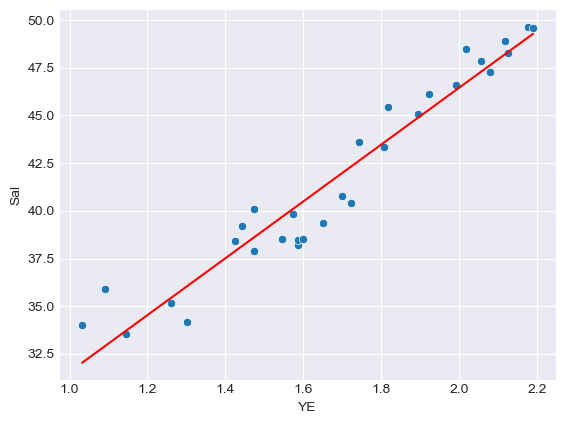

In [43]:
# Best line plot
plt.plot(cbrt_x,model_4.params[0]+model_4.params[1]*(cbrt_x),"r")
sns.scatterplot(cbrt_x,cbrt_y)

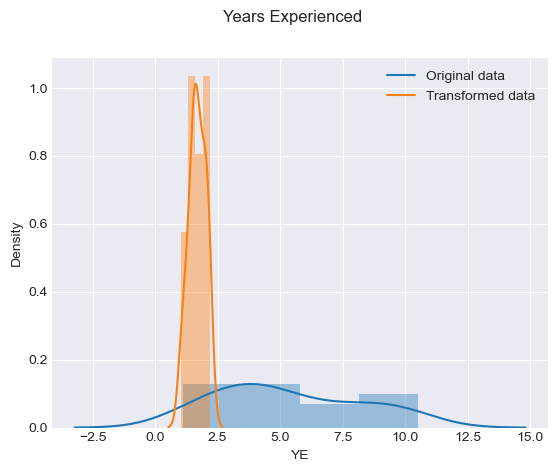

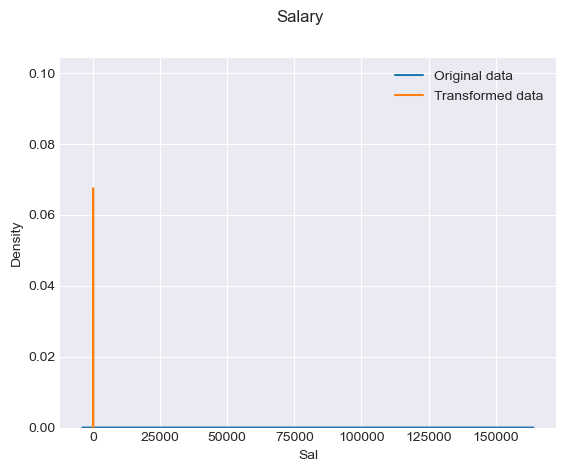

In [44]:
# Plotting with original data and log data
plt.subplots(1,1)
plt.suptitle("Years Experienced")
sns.distplot(x)
sns.distplot(cbrt_x)
labels = ("Original data","Transformed data")
plt.legend(labels)

plt.subplots(1,1)
plt.suptitle("Salary")
sns.distplot(y)
sns.distplot(cbrt_y)

labels = ("Original data","Transformed data")
plt.legend(labels)
plt.show()

In [45]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cbrt_y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           6.37e-18
Time:                        18:48:18   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6603      1.300     12.811      0.000      13.996      19.324
cbrt_x        14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# The accuracy of the model is 93%.

#### After doing the transformations we conclude that we should go for without transformation because the accuracy is best in without transformation of data

In [49]:
# Checking all are models and r squared and storing all the models in a dataframe.
set = {'Prepared Model':['model','model_1','model_2','model_3','model_4'],'Rsquared':[0.956957,
                                                                                   model_1.rsquared,
                                                                                  model_2.rsquared,
                                                                                  model_3.rsquared,
                                                                                      model_4.rsquared
                                                                                  ]}
t = pd.DataFrame(set)
t

,Prepared Model,Rsquared
0,model,0.956957
1,model_1,0.905215
2,model_2,0.954088
3,model_3,0.941949
4,model_4,0.932443


# Predection of Model

In [50]:
model=LinearRegression()
model.fit(data[["YE"]],data["Sal"])

LinearRegression()

In [51]:
pred=model.predict(data[["YE"]])
pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [52]:
model.intercept_

25792.20019866871

In [53]:
model.coef_

array([9449.96232146])